In [254]:
jupyter nbconvert --to=script notebook.ipynb

SyntaxError: invalid syntax (1993537901.py, line 1)

In [2]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [255]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import findspark
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#pd.options.display.mpl_style = 'default'
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.sql import SparkSession
from sklearn import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import math
findspark.init()

spark = SparkSession.builder \
        .appName("Gasoline Production") \
        .master("local[*]") \
        .getOrCreate()

print("Start project")




Start project


In [3]:
cwd = os.getcwd()
GET_DIR = os.path.dirname(cwd)
CUR_DIR = os.path.join(GET_DIR, r"C:\Users\acerm\de_project\gasprice\weekly-gasoline.csv")
print(os.listdir(CUR_DIR))

C:\Users\acerm\de_project\gasprice\weekly-gasoline.csv


In [196]:
df = pd.read_csv(r"\Users\acerm\de_project\gasprice\weekly-gasoline.csv")

In [197]:
df.head(100)

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
0,2023,16,2393748000,2417856000,-24108000,39649722000,-3024672000
1,2023,15,2367876000,2324364000,43512000,37255974000,-3000564000
2,2023,14,2222052000,2402568000,-180516000,34888098000,-3044076000
3,2023,13,2209116000,2858856000,-649740000,32666046000,-2863560000
4,2023,12,2742138000,2641884000,100254000,30456930000,-2213820000
...,...,...,...,...,...,...,...
95,2021,26,2613954000,1957746000,656208000,62466474000,-6394206000
96,2021,25,2533104000,2598078000,-64974000,59852520000,-7050414000
97,2021,24,2481948000,2850624000,-368676000,57319416000,-6985440000
98,2021,23,2565444000,2778006000,-212562000,54837468000,'-6616764000


In [198]:
df.dtypes

Fiscal Year                             int64
Fiscal Week                             int64
Current Year Production                 int64
Previous Year Production                int64
Difference From Same Week Last Year    object
Current Year Cumulative Production      int64
Cumulative Difference                  object
dtype: object

In [199]:
df.describe()

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02
mean,2021.190751,24.988439,2.539688e+09,2.580181e+09,6.354951e+10
std,0.972605,15.433650,2.351308e+08,3.182352e+08,3.890603e+10
min,2020.000000,1.000000,1.489110e+09,0.000000e+00,2.433144e+09
25%,2020.000000,11.000000,2.450784e+09,2.516052e+09,3.002887e+10
50%,2021.000000,24.000000,2.576028e+09,2.655408e+09,6.145423e+10
75%,2022.000000,38.000000,2.696862e+09,2.750076e+09,9.689564e+10
max,2023.000000,53.000000,2.952642e+09,2.952642e+09,1.380000e+11


In [200]:
df.shape


(173, 7)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Fiscal Year                          173 non-null    int64 
 1   Fiscal Week                          173 non-null    int64 
 2   Current Year Production              173 non-null    int64 
 3   Previous Year Production             173 non-null    int64 
 4   Difference From Same Week Last Year  172 non-null    object
 5   Current Year Cumulative Production   173 non-null    int64 
 6   Cumulative Difference                173 non-null    object
dtypes: int64(5), object(2)
memory usage: 9.6+ KB


# Preprocessing the data

In [205]:
df['Cumulative Difference'] = pd.to_numeric(df['Cumulative Difference'], errors='coerce')
df['Difference From Same Week Last Year'] =pd.to_numeric(df['Difference From Same Week Last Year'], errors='coerce')


In [206]:
df.dtypes


Fiscal Year                              int64
Fiscal Week                              int64
Current Year Production                  int64
Previous Year Production                 int64
Difference From Same Week Last Year    float64
Current Year Cumulative Production       int64
Cumulative Difference                  float64
dtype: object

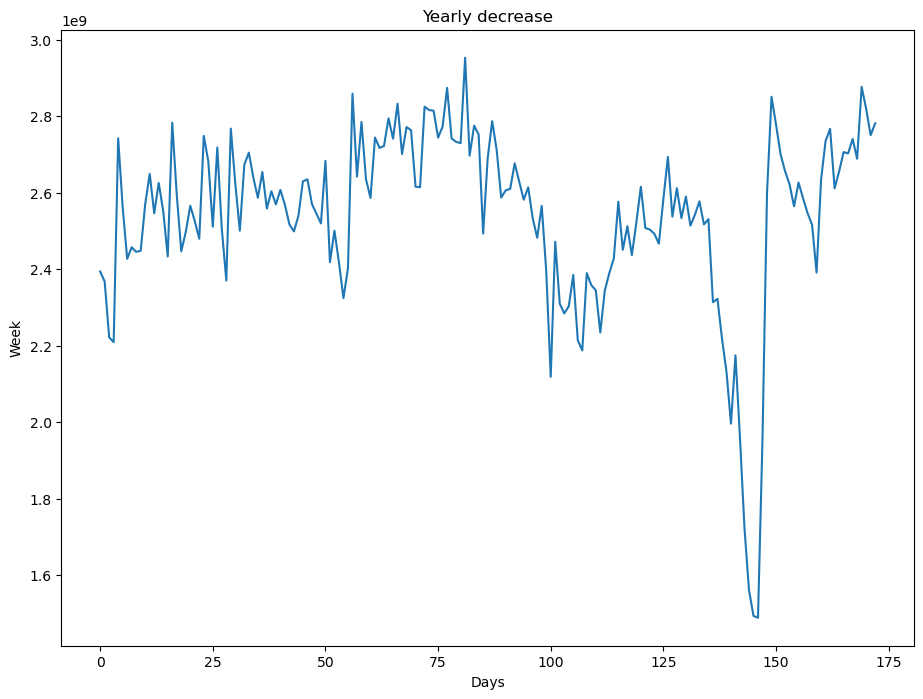

In [207]:
plt.figure(figsize=(11, 8)) # resizing the plot
df['Current Year Production'].plot()
plt.title('Yearly decrease') # adding a title
plt.xlabel('Days') # x label
plt.ylabel('Week') # y label
plt.show()

In [208]:
df.groupby('Fiscal Year')['Current Year Production', "Previous Year Production"].aggregate('sum')

,Current Year Production,Previous Year Production
Fiscal Year,,
2020,128446248000,142194570000
2021,133056168000,128446248000
2022,138213810000,133056168000
2023,39649722000,42674394000


In [209]:
def pre_process():
    df['Differences_Current_and_Previouse']= df['Current Year Production'] - df['Previous Year Production']
    df['Percentage_increase_Current_and_Previouse']= df['Current Year Production'] - df['Previous Year Production'].pct_change()
    df = df.sort_values(['Fiscal Year', 'Current Year Production','Previous Year Production']).reset_index(drop=True)
    df['Decrease_PCT'] = (df['Current Year Production'] - df['Previous Year Production']) / df['Previous Year Production'] * 100.0
    df['PCT_change_Cumulative_Difference'] = (df['Current Year Cumulative Production'] - df['Cumulative Difference']) / df['Cumulative Difference'] * 100.0

    return df

In [210]:
df 


,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09
...,...,...,...,...,...,...,...
168,2020,5,2688630000,2675106000,13524000.0,13915902000,4.080720e+08
169,2020,4,2876496000,2723028000,153468000.0,11227272000,3.945480e+08
170,2020,3,2819460000,2741256000,78204000.0,8350776000,2.410800e+08
171,2020,2,2750076000,2699508000,50568000.0,5531316000,1.628760e+08


In [211]:
df.corr('pearson')

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
Fiscal Year,1.000000,-0.193511,0.133656,-0.167846,-0.354408,-0.174335,0.136592
Fiscal Week,-0.193511,1.000000,0.034812,-0.027237,0.025591,0.998181,0.413464
Current Year Production,0.133656,0.034812,1.000000,-0.200081,0.448888,0.046859,0.133397
Previous Year Production,-0.167846,-0.027237,-0.200081,1.000000,-0.888624,-0.026013,0.149880
Difference From Same Week Last Year,-0.354408,0.025591,0.448888,-0.888624,1.000000,0.000950,-0.167270
Current Year Cumulative Production,-0.174335,0.998181,0.046859,-0.026013,0.000950,1.000000,0.444351
Cumulative Difference,0.136592,0.413464,0.133397,0.149880,-0.167270,0.444351,1.000000


# Get the correclation to a target variables

<AxesSubplot:>

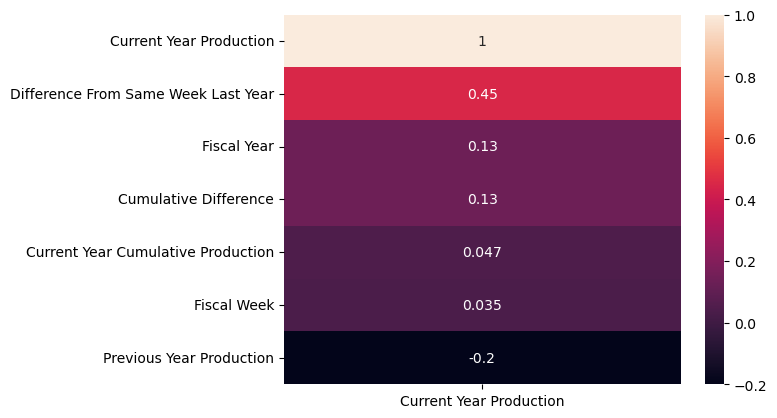

In [212]:
t_corr = df.corr()[['Current Year Production']].sort_values(by=['Current Year Production'], ascending=False)
sns.heatmap(t_corr, annot=True)

<Figure size 1400x700 with 0 Axes>

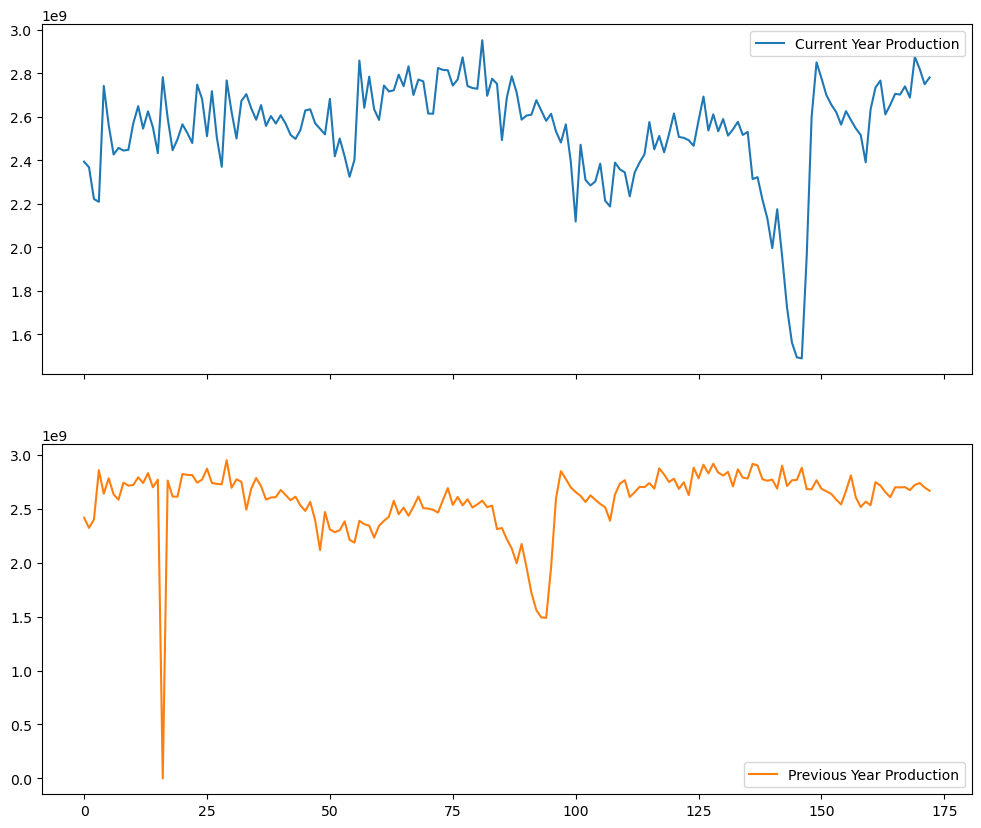

In [214]:
plt.figure(figsize=(14, 7)) # resizing the plot
cols = ['Current Year Production',
        'Previous Year Production']
axes = df[cols].plot(figsize=(12, 10), subplots = True)
plt.show()

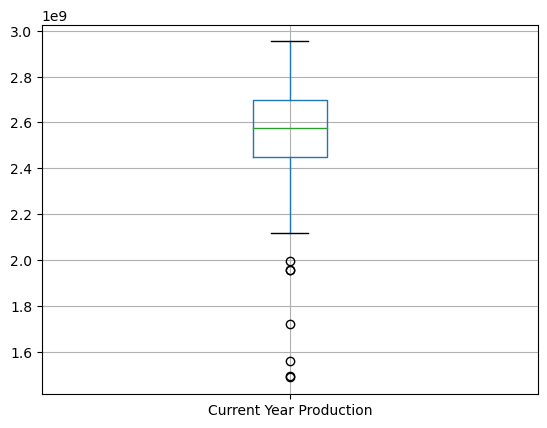

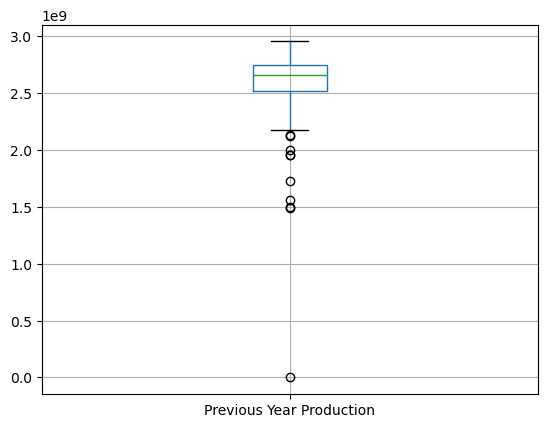

In [215]:
cols = ['Current Year Production',  'Previous Year Production']
for i in cols:
    plt.subplots()
    axes = df.boxplot(column= [i])
plt.show()

In [ ]:
#df['Production'] = pd.to_numeric(df['Production'], errors='coerce')

# Processing the data, Adding features

In [216]:
df.head(5)

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09


In [217]:
df.isnull().sum()

Fiscal Year                             0
Fiscal Week                             0
Current Year Production                 0
Previous Year Production                0
Difference From Same Week Last Year    58
Current Year Cumulative Production      0
Cumulative Difference                  49
dtype: int64

In [218]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
168    False
169    False
170    False
171    False
172    False
Length: 173, dtype: bool

In [219]:
df= df.loc[~(df.isna().sum(axis=1)>=5)]

In [220]:
df.head(100)


,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09
...,...,...,...,...,...,...,...
95,2021,26,2613954000,1957746000,656208000.0,62466474000,-6.394206e+09
96,2021,25,2533104000,2598078000,-64974000.0,59852520000,-7.050414e+09
97,2021,24,2481948000,2850624000,-368676000.0,57319416000,-6.985440e+09
98,2021,23,2565444000,2778006000,-212562000.0,54837468000,NaN


In [221]:
df.fillna(value=0, inplace=True)

In [222]:
df.head(100)

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09
...,...,...,...,...,...,...,...
95,2021,26,2613954000,1957746000,656208000.0,62466474000,-6.394206e+09
96,2021,25,2533104000,2598078000,-64974000.0,59852520000,-7.050414e+09
97,2021,24,2481948000,2850624000,-368676000.0,57319416000,-6.985440e+09
98,2021,23,2565444000,2778006000,-212562000.0,54837468000,0.000000e+00


# Forcast Production

In [225]:
forecast_production = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_production)
df['Production'] = df['Current Year Production'].shift(-forecast_production)

9


In [226]:
df.head(5)

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference,Production
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09,2.448138e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09,2.570148e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09,2.649234e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09,2.546040e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09,2.625420e+09


# Remove rows with infiniit and Null value


In [227]:
df = df[np.isfinite(df).all(1)]

In [228]:
df.head()

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference,Production
0,2023,16,2393748000,2417856000,-24108000.0,39649722000,-3.024672e+09,2.448138e+09
1,2023,15,2367876000,2324364000,43512000.0,37255974000,-3.000564e+09,2.570148e+09
2,2023,14,2222052000,2402568000,-180516000.0,34888098000,-3.044076e+09,2.649234e+09
3,2023,13,2209116000,2858856000,-649740000.0,32666046000,-2.863560e+09,2.546040e+09
4,2023,12,2742138000,2641884000,100254000.0,30456930000,-2.213820e+09,2.625420e+09


In [229]:
production_scaler = StandardScaler()
X_prod = np.array(df.drop(['Production'], 1))
production_scaler.fit(X_prod)
X_prod = production_scaler.transform(X_prod)

# Prediction of the feature productions

In [230]:
x_pred = X_prod[-forecast_production:] # data to be predicted
X = X_prod[:-forecast_production] # data to be trained

In [231]:
print(x_pred.shape)
print(X.shape)
print(x_pred)
print(X)

(9, 7)
(155, 7)
[[-1.31673081 -0.53744782  0.41675074  0.28758556 -0.25476056 -0.47785052
  -0.41879315]
 [-1.31673081 -0.6039195   0.24166845  0.73216195 -0.25476056 -0.54701791
  -0.40329335]
 [-1.31673081 -0.67039118  0.07784146  0.10196813 -0.25476056 -0.61510129
  -0.3179337 ]
 [-1.31673081 -0.73686285 -0.05221966 -0.1723835  -0.25476056 -0.68217035
  -0.29512684]
 [-1.31673081 -0.80333453 -0.58371945 -0.01845684 -0.25476056 -0.74843415
  -0.29435185]
 [-1.31673081 -0.86980621  0.45176719 -0.11986734  0.12977007 -0.81140721
  -0.22770269]
 [-1.31673081 -0.93627788  0.8794682   0.53658456 -0.25476056 -0.88079141
  -0.26512365]
 [-1.31673081 -1.00274956  1.01453167  0.44151221 -0.06363291 -0.95282367
  -0.26014157]
 [-1.31673081 -1.06922123  0.35297076  0.25408388 -0.25476056 -1.02569217
  -0.27874133]]
[[ 1.82808258 -0.67039118 -0.57246416 ... -0.34804906 -0.7012721
  -1.58836425]
 [ 1.82808258 -0.73686285 -0.68251588 ... -0.0863862  -0.76431485
  -1.57928579]
 [ 1.82808258 -0.8033

# Trying to   get the Target variables for predictions

In [232]:
df.dropna(inplace=True)
y=np.array(df['Production'])

In [233]:
X = df.iloc[:,1:31].values
y = df.iloc[:,1].values
print(X.shape)
print(X, y)

(164, 7)
[[ 1.6000000e+01  2.3937480e+09  2.4178560e+09 ...  3.9649722e+10
  -3.0246720e+09  2.4481380e+09]
 [ 1.5000000e+01  2.3678760e+09  2.3243640e+09 ...  3.7255974e+10
  -3.0005640e+09  2.5701480e+09]
 [ 1.4000000e+01  2.2220520e+09  2.4025680e+09 ...  3.4888098e+10
  -3.0440760e+09  2.6492340e+09]
 ...
 [ 1.2000000e+01  2.7350820e+09  2.7483120e+09 ...  3.2833332e+10
   4.8921600e+08  2.8194600e+09]
 [ 1.1000000e+01  2.7668340e+09  2.7174420e+09 ...  3.0098250e+10
   5.0244600e+08  2.7500760e+09]
 [ 1.0000000e+01  2.6113080e+09  2.6565840e+09 ...  2.7331416e+10
   4.5305400e+08  2.7812400e+09]] [16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1 53 52 51 50 49 48 47 46
 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22
 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1 52 51 50
 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26
 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2
  1 52 51 50 49 48 47 46 4

In [235]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (131, 7)
y_train shape:  (131,)
x_test shape:  (33, 7)
y_test shape:  (33,)


# Lets see what gives us the nearest accuracy with LinearRegression Model

In [237]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_value = lr.score(x_test, y_test)

In [238]:
lr_value

1.0

In [108]:
# Lets see what we get using Random Forest

In [239]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_value = rf.score(x_test, y_test)

In [240]:
rf_value


0.9988386676684198

# Lets see what we get using Ridge

In [241]:
rg = Ridge()
rg.fit(x_train, y_train)
rg_value = rg.score(x_test, y_test)

In [242]:
rg_value

0.9999989386633575

# Lets see what we get using SVR

In [243]:
svr = SVR()
svr.fit(x_train, y_train)
svr_value= svr.score(x_test, y_test)


In [244]:
svr_value

0.965796313370121

# Now lets check what models has the best accuracy

In [245]:
models = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['models', 'accuracy']
scores = [lr_value, rf_value, rg_value, svr_value]

target_value = pd.DataFrame([[x,y] for x, y in zip(models, scores)], columns=columns)


In [246]:
target_value

,models,accuracy
0,Linear Regression,1.000000
1,Random Forest,0.998839
2,Ridge,0.999999
3,SVR,0.965796


# Let check which model is best used by performance

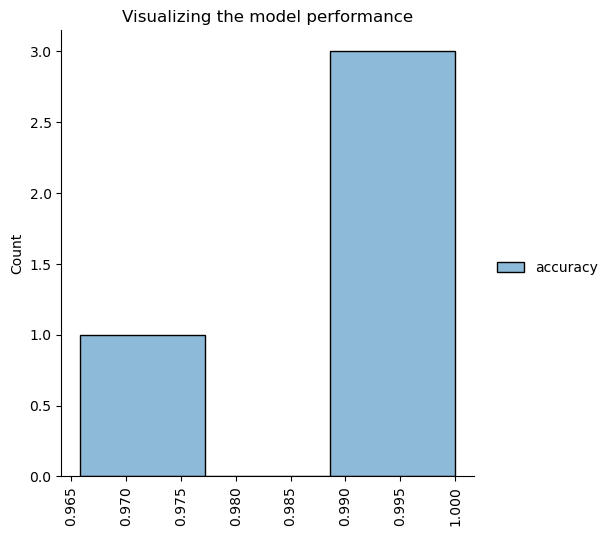

In [247]:
sns.displot(target_value, label='prediction')
plt.title('Visualizing the model performance')
plt.xticks(rotation='vertical')

plt.show()


This shows that LinearRegression has the highest accuracy so we can use this model to try and predict the x_pred data

In [248]:
import datetime

last_date = df.index[-1] #getting the lastdate in the dataset
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast = lr.predict(x_pred) # predicting forecast data
df['Prediction'] = np.nan
for i in forecast:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

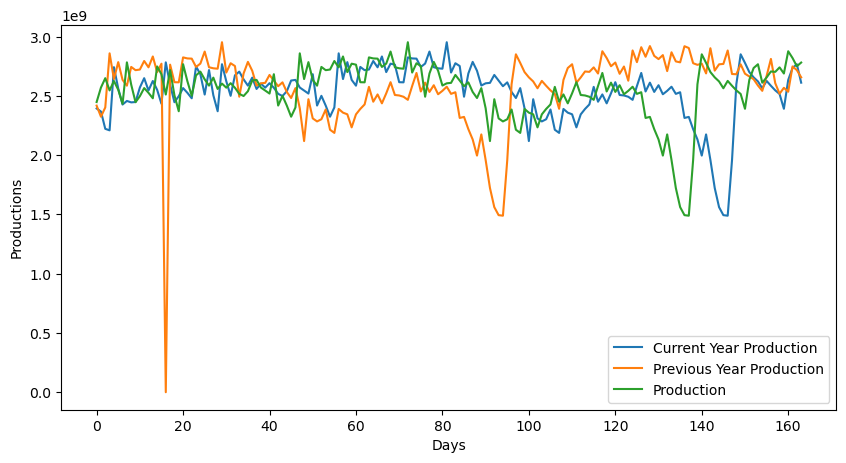

In [249]:
plt.figure(figsize=(10, 5))
df['Current Year Production'].plot()
df['Previous Year Production'].plot()
df['Production'].plot()
plt.legend(loc=4)
plt.xlabel('Days')
plt.ylabel('Productions')
plt.show()




In [250]:
df.head(5)

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Difference From Same Week Last Year,Current Year Cumulative Production,Cumulative Difference,Production,Prediction
0,2023.0,16.0,2.393748e+09,2.417856e+09,-24108000.0,3.964972e+10,-3.024672e+09,2.448138e+09,NaN
1,2023.0,15.0,2.367876e+09,2.324364e+09,43512000.0,3.725597e+10,-3.000564e+09,2.570148e+09,NaN
2,2023.0,14.0,2.222052e+09,2.402568e+09,-180516000.0,3.488810e+10,-3.044076e+09,2.649234e+09,NaN
3,2023.0,13.0,2.209116e+09,2.858856e+09,-649740000.0,3.266605e+10,-2.863560e+09,2.546040e+09,NaN
4,2023.0,12.0,2.742138e+09,2.641884e+09,100254000.0,3.045693e+10,-2.213820e+09,2.625420e+09,NaN


<AxesSubplot:>

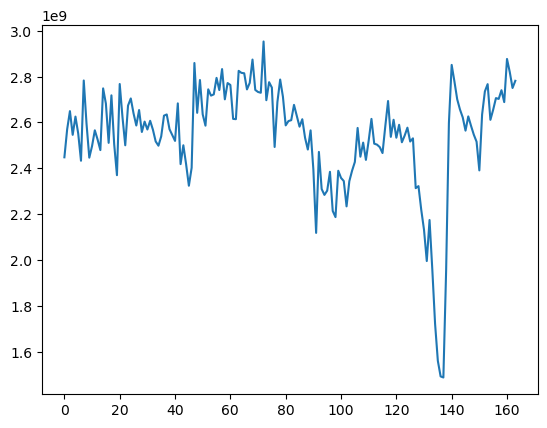

In [251]:
df['Production'].plot()